# Generating predictions for model

In [1]:
!pip install ultralytics
import ultralytics
from ultralytics import YOLO


[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the pre-trained model

In [88]:
model1 = YOLO('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\last.pt')

In [92]:
categories = ['bottle-blue', 'bottle-green', 'bottle-dark', 'bottle-milk', 'bottle-transp', 'bottle-multicolor', 'bottle-yogurt', 'bottle-oil', 'cans', 'juice-cardboard', 
'milk-cardboard', 'detergent-color', 'detergent-transparent', 'detergent-box', 'canister', 'bottle-blue-full', 'bottle-transp-full', 'bottle-dark-full', 
'bottle-green-full', 'bottle-multicolorv-full', 'bottle-milk-full', 'bottle-oil-full', 'detergent-white', 'bottle-blue5l', 'bottle-blue5l-full', 'glass-transp', 
'glass-dark', 'glass-green']

# Checking the predictions on each image

In [99]:
items = np.zeros(len(categories))
img = 'D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Monitoring_photo_2_test_25-Mar_11-11-23.jpg'
results = model1.predict(img)
for r in results:
        # print("r",r)
        for c in r.boxes.cls:
            print("c",c)
            print(model1.names[int(c)])
            items[int(c)] += 1
print(items)


image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Monitoring_photo_2_test_25-Mar_11-11-23.jpg: 1088x1920 1 cans, 1 detergent-box, 1 bottle-milk-full, 1150.7ms
Speed: 56.7ms preprocess, 1150.7ms inference, 4.5ms postprocess per image at shape (1, 3, 1920, 1920)


c tensor(13.)
detergent-box
c tensor(8.)
cans
c tensor(20.)
bottle-milk-full
[          0           0           0           0           0           0           0           0           1           0           0           0           0           1           0           0           0           0           0           0           1           0           0           0           0           0
           0           0]


# Code to show bounding boxes on images

In [89]:
img = 'D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Monitoring_photo_2_test_25-Mar_11-11-23.jpg'
results = model1(img, save=True)


image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Monitoring_photo_2_test_25-Mar_11-11-23.jpg: 1088x1920 1 cans, 1 detergent-box, 1 bottle-milk-full, 2317.3ms
Speed: 53.3ms preprocess, 2317.3ms inference, 26.0ms postprocess per image at shape (1, 3, 1920, 1920)
Results saved to runs\detect\predict3


# Checking predictions on entire test data

In [100]:
train_path = "D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Dataset\\Warp-D\\train\\images"
test_path = "D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Dataset\\Warp-D\\test\\images"

In [108]:
lst = []
import os
for i in os.listdir(test_path):
    items = np.zeros(len(categories))
    results = model1.predict(os.path.join(test_path,i))
    for r in results:
            # print("r",r)
            for c in r.boxes.cls:
                # print("c",c)
                # print(model1.names[int(c)])
                items[int(c)] += 1
    # append image name and items list to lst
    items = items.tolist()
    items.insert(0,i)
    lst.append(items)
print(lst)


image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Dataset\Warp-D\test\images\Monitoring_photo2_04-Mar_00-47-42.jpg: 1088x1920 1 detergent-color, 1 detergent-transparent, 1579.0ms
Speed: 81.4ms preprocess, 1579.0ms inference, 8.0ms postprocess per image at shape (1, 3, 1920, 1920)

image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Dataset\Warp-D\test\images\Monitoring_photo_04-Mar_08-36-50.jpg: 1088x1920 1 bottle-green, 1 detergent-box, 1625.6ms
Speed: 24.0ms preprocess, 1625.6ms inference, 7.4ms postprocess per image at shape (1, 3, 1920, 1920)

image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Dataset\Warp-D\test\images\Monitoring_photo_2_test_25-Mar_11-09-46.jpg: 1088x1920 1 bottle-transp, 1 milk-cardboard, 2244.7ms
Speed: 240.2ms preprocess, 2244.7ms inference, 4.0ms postprocess per image at shape (1, 3, 1920, 1920)

image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Dataset\Warp-D\test\images\Monitoring_photo_2_test_25-Mar

[['Monitoring_photo2_04-Mar_00-47-42.jpg', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ['Monitoring_photo_04-Mar_08-36-50.jpg', 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ['Monitoring_photo_2_test_25-Mar_11-09-46.jpg', 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ['Monitoring_photo_2_test_25-Mar_11-11-15.jpg', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ['Monitoring_photo_2_test_25-Mar_11-11-23.jpg', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], ['Monitoring_photo_2_test_25-Mar_11-12-02.jpg', 0.0, 0.0, 0.0, 0.0,

In [117]:
# save lst to csv file
df = pd.DataFrame(lst, columns = ['Image Name'] + categories)
df.to_csv('D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\final_Data.csv', index=False)

In [82]:
img = 'D:\\Devansh - Nirma\\6th Semester\\Data Mining\\Innovative\\Monitoring_photo1_04-Mar_03-09-16.jpg'
results = model1(img)  # list of Results objects

for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    probs = result.probs  # Class probabilities for classification outputs
    print("boxes",boxes)
    print(result.boxes.cls)
    # convert tensor to numpy array
    b = np.array(result.boxes.cls)
    print(b)
    print(b.shape)


image 1/1 D:\Devansh - Nirma\6th Semester\Data Mining\Innovative\Monitoring_photo1_04-Mar_03-09-16.jpg: 1088x1920 1 bottle-blue, 1664.4ms
Speed: 38.5ms preprocess, 1664.4ms inference, 2.0ms postprocess per image at shape (1, 3, 1920, 1920)
WARNING  'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


boxes ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[2.4661e+02, 3.2077e+02, 4.3616e+02, 7.2976e+02, 4.3860e-01, 0.0000e+00]])
cls: tensor([0.])
conf: tensor([0.4386])
data: tensor([[2.4661e+02, 3.2077e+02, 4.3616e+02, 7.2976e+02, 4.3860e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: tensor([1080, 1920])
shape: torch.Size([1, 6])
xywh: tensor([[341.3854, 525.2643, 189.5567, 408.9868]])
xywhn: tensor([[0.1778, 0.4864, 0.0987, 0.3787]])
xyxy: tensor([[246.6070, 320.7709, 436.1637, 729.7577]])
xyxyn: tensor([[0.1284, 0.2970, 0.2272, 0.6757]])
tensor([0.])
[          0]
(1,)


In [91]:
categories = ['bottle-blue', 'bottle-green', 'bottle-dark', 'bottle-milk', 'bottle-transp', 'bottle-multicolor', 'bottle-yogurt', 'bottle-oil', 'cans', 'juice-cardboard', 
'milk-cardboard', 'detergent-color', 'detergent-transparent', 'detergent-box', 'canister', 'bottle-blue-full', 'bottle-transp-full', 'bottle-dark-full', 
'bottle-green-full', 'bottle-multicolorv-full', 'bottle-milk-full', 'bottle-oil-full', 'detergent-white', 'bottle-blue5l', 'bottle-blue5l-full', 'glass-transp', 
'glass-dark', 'glass-green']

In [7]:
# create a dataframe with the categories as columns and random int between 0 to 2 as values
df = pd.DataFrame(np.random.randint(0,3,size=(100, len(categories))), columns=categories)
df

,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,juice-cardboard,...,bottle-green-full,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green
0,2,0,2,1,2,0,0,0,1,0,...,0,1,1,0,1,1,2,2,0,1
1,2,0,2,1,1,2,0,2,0,2,...,0,0,1,0,0,1,0,0,0,2
2,1,1,0,2,0,2,1,0,1,2,...,2,2,2,0,1,0,0,1,1,1
3,0,0,1,2,0,2,0,2,2,2,...,1,0,0,0,1,1,1,2,1,1
4,1,1,2,2,0,2,0,1,2,2,...,1,2,2,0,2,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,0,0,1,1,0,1,1,1,...,1,2,2,0,0,0,2,1,2,2
96,2,2,2,0,1,0,0,0,2,0,...,0,1,0,1,2,2,0,1,2,1
97,2,1,1,0,0,0,0,1,0,2,...,1,1,2,2,1,2,0,0,1,2
98,1,1,2,0,2,1,0,1,2,1,...,1,0,0,1,1,1,1,1,0,1


In [24]:
df.to_csv('data1.csv', index=False)

In [ ]:
df = pd.read_csv('data1.csv')
df1['area'] = df['area']

# write code here to add area synthesizer

<Axes: >

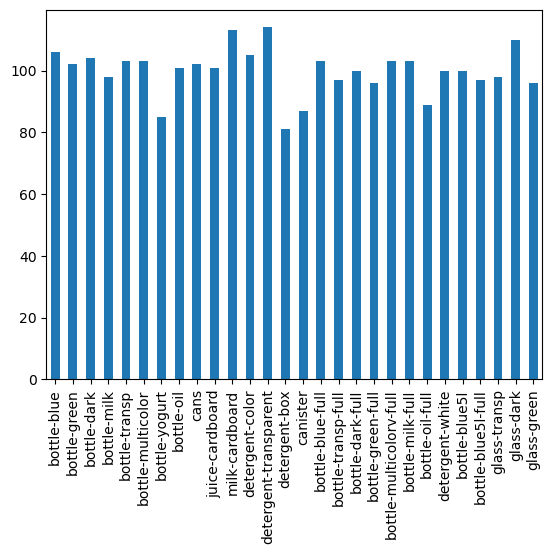

In [8]:
# generate a bar plot with the categories as x-axis and the number of occurences as y-axis
df.sum().plot.bar()

<Axes: ylabel='None'>

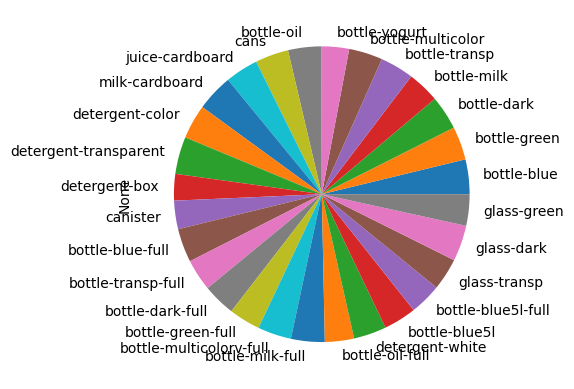

In [9]:
# generate a pie chart with the categories as labels and the number of occurences as values
df.sum().plot.pie()

# generate both these plots for area wise data also

In [12]:
# generate frequent itemsets
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 

In [25]:
df = pd.read_csv('data2.csv')

In [28]:
# replacing 0 with False, > 0 with True in df1 - all columns except the last one
df1 = df.iloc[:, :-1] > 0
df1['area'] = df['area']
df1

,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,juice-cardboard,...,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green,area
0,True,False,True,True,True,False,False,False,True,False,...,True,True,False,True,True,True,True,False,True,Vasna
1,True,False,True,True,True,True,False,True,False,True,...,False,True,False,False,True,False,False,False,True,Dharnidhar
2,True,True,False,True,False,True,True,False,True,True,...,True,True,False,True,False,False,True,True,True,Science City
3,False,False,True,True,False,True,False,True,True,True,...,False,False,False,True,True,True,True,True,True,Ashram Road
4,True,True,True,True,False,True,False,True,True,True,...,True,True,False,True,True,False,False,True,False,Bopal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,True,True,False,False,True,True,False,True,True,True,...,True,True,False,False,False,True,True,True,True,Naranpura
96,True,True,True,False,True,False,False,False,True,False,...,True,False,True,True,True,False,True,True,True,Paldi
97,True,True,True,False,False,False,False,True,False,True,...,True,True,True,True,True,False,False,True,True,Nehrunagar
98,True,True,True,False,True,True,False,True,True,True,...,False,False,True,True,True,True,True,False,True,Vaishnodevi


In [23]:
df1.to_csv('data.csv', index=False)

In [37]:
# filter dataset by area
names = []
for x in df1['area'].unique():
    df2 = df1[df1['area'] == x]
    df2 = df2.drop('area', axis=1)
    names.append('data' + str(x))
    df2.to_csv('data' + str(x) + '.csv', index=False)

In [48]:
for i in names:
    df3 = pd.read_csv(i+'.csv')
    # print(df3.head)
    frequent_itemsets = apriori(df3, min_support=0.8, use_colnames=True)
    print("hi")
    frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
    # print(frequent_itemsets)
    with open(i+'.txt', 'a') as f:
        f.write(str(frequent_itemsets))

hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


In [50]:
df3 = pd.read_csv('dataPaldi.csv')
df3.head()

,bottle-blue,bottle-green,bottle-dark,bottle-milk,bottle-transp,bottle-multicolor,bottle-yogurt,bottle-oil,cans,juice-cardboard,...,bottle-green-full,bottle-multicolorv-full,bottle-milk-full,bottle-oil-full,detergent-white,bottle-blue5l,bottle-blue5l-full,glass-transp,glass-dark,glass-green
0,True,True,True,False,False,False,False,True,True,True,...,False,True,True,True,True,True,True,True,False,False
1,True,True,True,True,True,True,False,True,True,True,...,True,False,True,True,True,True,True,True,True,True
2,True,True,False,True,False,False,True,False,True,True,...,False,True,True,True,True,False,True,False,False,True
3,True,True,True,False,True,False,False,False,True,False,...,False,True,False,True,True,True,False,True,True,True


In [51]:
frequent_itemsets = apriori(df3, min_support=0.5, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets.to_csv('frequent_itemsets_paldi.csv', index=False)

In [18]:
# generate support count of each item
frequent_itemsets = apriori(df1, min_support=0.5, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
frequent_itemsets

,support,itemsets
10,0.75,(milk-cardboard)
26,0.74,(glass-dark)
12,0.73,(detergent-transparent)
2,0.70,(bottle-dark)
0,0.69,(bottle-blue)
...,...,...
51,0.50,"(milk-cardboard, detergent-color)"
50,0.50,"(glass-dark, juice-cardboard)"
48,0.50,"(glass-dark, cans)"
46,0.50,"(detergent-transparent, cans)"


In [22]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.05)
rules = rules.sort_values(by='confidence', ascending=False)
print(rules)

             antecedents              consequents  antecedent support  \
44  (bottle-transp-full)         (milk-cardboard)                0.61   
55   (bottle-green-full)             (glass-dark)                0.62   
27         (bottle-milk)         (milk-cardboard)                0.64   
2         (bottle-green)         (milk-cardboard)                0.67   
21    (bottle-milk-full)  (detergent-transparent)                0.66   
..                   ...                      ...                 ...   
80          (glass-dark)                   (cans)                0.74   
84          (glass-dark)          (bottle-blue5l)                0.74   
75      (milk-cardboard)       (bottle-blue-full)                0.75   
70      (milk-cardboard)       (bottle-dark-full)                0.75   
76      (milk-cardboard)        (detergent-color)                0.75   

    consequent support  support  confidence      lift  leverage  conviction  \
44                0.75     0.51    0.836066 